# Question-1]Salary Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split


In [2]:
df_train=pd.read_csv("E:\\data scines\\Assignment-Data sciencs\\Support Vecoter\\SalaryData_Train(1).csv")
print(df_train)

       age          workclass    education  educationno        maritalstatus  \
0       39          State-gov    Bachelors           13        Never-married   
1       50   Self-emp-not-inc    Bachelors           13   Married-civ-spouse   
2       38            Private      HS-grad            9             Divorced   
3       53            Private         11th            7   Married-civ-spouse   
4       28            Private    Bachelors           13   Married-civ-spouse   
...    ...                ...          ...          ...                  ...   
30156   27            Private   Assoc-acdm           12   Married-civ-spouse   
30157   40            Private      HS-grad            9   Married-civ-spouse   
30158   58            Private      HS-grad            9              Widowed   
30159   22            Private      HS-grad            9        Never-married   
30160   52       Self-emp-inc      HS-grad            9   Married-civ-spouse   

               occupation    relationsh

In [3]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df_train.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
30160,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
df_train.shape

(30161, 14)

In [6]:
df_test=pd.read_csv("E:\\data scines\\Assignment-Data sciencs\\Support Vecoter\\SalaryData_Test(1).csv")


In [7]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [8]:
df_test.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K
15059,35,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K


In [9]:
#merge the 2 dataset for analysis
df = df_train.append(df_test)
df.shape

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7048\3012485603.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train.append(df_test)


(45221, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45221 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [11]:
#educationno and education depicts the same thing, we can go ahead and delete one
df.drop('educationno', axis=1, inplace=True)

In [12]:
df.shape

(45221, 13)

In [13]:
df.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# EDA & Feature Engineering

In [14]:
#check for missing values
df.isnull().sum()

age              0
workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [15]:
df.dtypes

age               int64
workclass        object
education        object
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

# Data Visualisation

In [16]:
df.columns

Index(['age', 'workclass', 'education', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'native', 'Salary'],
      dtype='object')

    index  Salary
0   <=50K   34013
1    >50K   11208


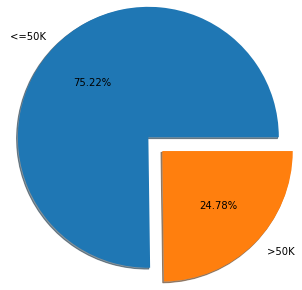

In [17]:
plt.rcParams['figure.figsize']=(3,3)
plt.pie(df.Salary.value_counts().values, labels = df.Salary.value_counts().index, autopct="%1.2f%%", radius =2, shadow=True, explode=(0,0.3))
print(df.Salary.value_counts().reset_index())

In [18]:
workclass_df = df.groupby(['Salary', 'workclass']).size().reset_index().rename(columns={0:'Num of individuals'})
workclass_df

,Salary,workclass,Num of individuals
0,<=50K,Federal-gov,857
1,<=50K,Local-gov,2185
2,<=50K,Private,26055
3,<=50K,Self-emp-inc,734
4,<=50K,Self-emp-not-inc,2737
5,<=50K,State-gov,1426
6,<=50K,Without-pay,19
7,>50K,Federal-gov,549
8,>50K,Local-gov,915
9,>50K,Private,7251


Text(0.5, 1.1, 'Workclass of individuals to corresponding Salary')

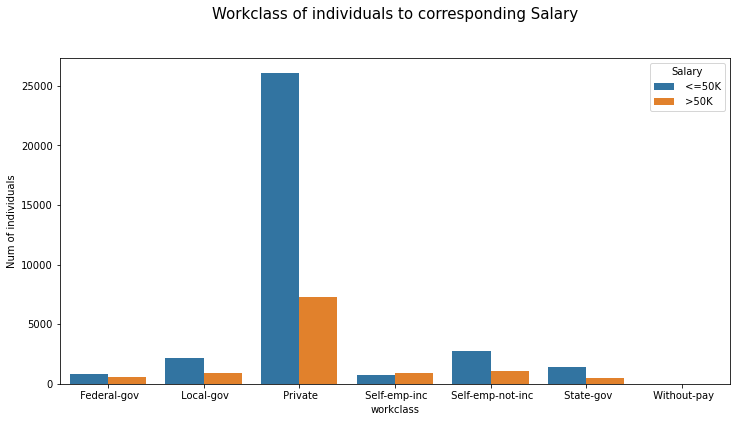

In [19]:
 plt.rcParams['figure.figsize']=(12,6)
sns.barplot(x = 'workclass', y='Num of individuals', hue='Salary', data=workclass_df)
plt.title("Workclass of individuals to corresponding Salary", y = 1.1, fontsize=15)

# Observation:

Most individuals are into private jobs with Salary <=50k.

In our data there are very less individual who are without pay opr unemployed.

In [21]:
import warnings
warnings.filterwarnings(action='ignore')

In [22]:
edu_df = df.groupby(['Salary', 'education']).size().reset_index().rename(columns={0:'Num of individuals'})
edu_df

,Salary,education,Num of individuals
0,<=50K,10th,1141
1,<=50K,11th,1530
2,<=50K,12th,534
3,<=50K,1st-4th,214
4,<=50K,5th-6th,427
5,<=50K,7th-8th,768
6,<=50K,9th,638
7,<=50K,Assoc-acdm,1109
8,<=50K,Assoc-voc,1455
9,<=50K,Bachelors,4392


Text(0.5, 1.03, 'Education of individuals to corresponding Salary')

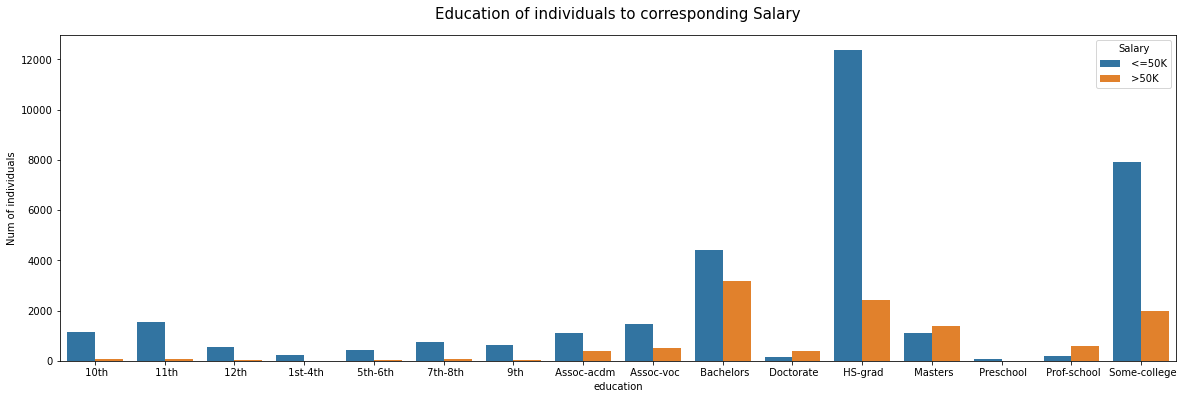

In [23]:
plt.rcParams['figure.figsize']=(20,6)
sns.barplot(x = 'education', y='Num of individuals', hue = 'Salary', data=edu_df)
plt.title("Education of individuals to corresponding Salary", y = 1.03, fontsize=15)

# Observations:

Most of the individuals have studied for 9 years.

Then the highest rankings are individuals who have studied for 10 & 13 years.

In [24]:
rel_df = df.groupby(['maritalstatus', 'relationship', 'Salary']).size().reset_index().rename(columns={0:'Num of indv'})
rel_df

,maritalstatus,relationship,Salary,Num of indv
0,Divorced,Not-in-family,<=50K,2994
1,Divorced,Not-in-family,>50K,441
2,Divorced,Other-relative,<=50K,159
3,Divorced,Other-relative,>50K,7
4,Divorced,Own-child,<=50K,413
5,Divorced,Own-child,>50K,16
6,Divorced,Unmarried,<=50K,2076
7,Divorced,Unmarried,>50K,191
8,Married-AF-spouse,Husband,<=50K,7
9,Married-AF-spouse,Husband,>50K,4


Text(0.5, 1.1, 'Salary category wrt Marital status')

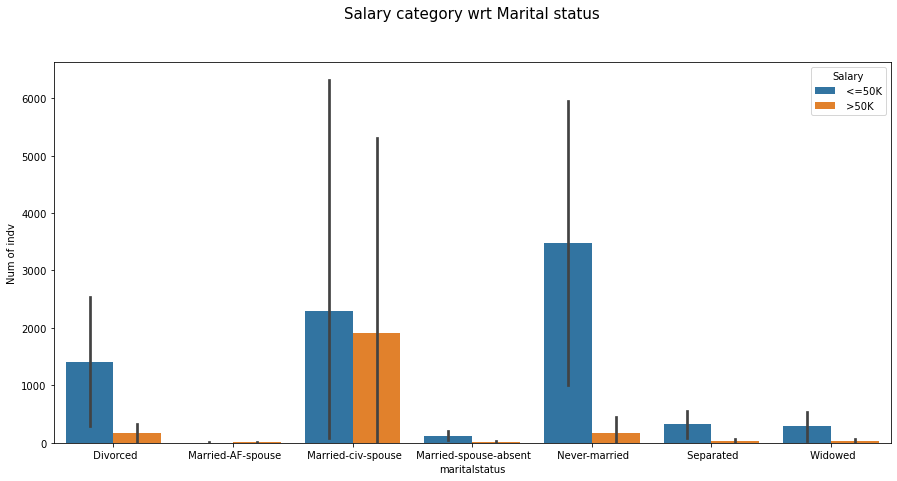

In [25]:
plt.rcParams['figure.figsize']=(15,7)
sns.barplot(x= 'maritalstatus', y='Num of indv', hue='Salary', data=rel_df)
plt.title("Salary category wrt Marital status", y = 1.1, fontsize=15)

Most individuals in our data are who have never married and are earning <=50k.



Then we have individuals who are married indv earning <=50k and then married indv earning >50k.

Text(0.5, 1.1, 'Salary category wrt Relationship')

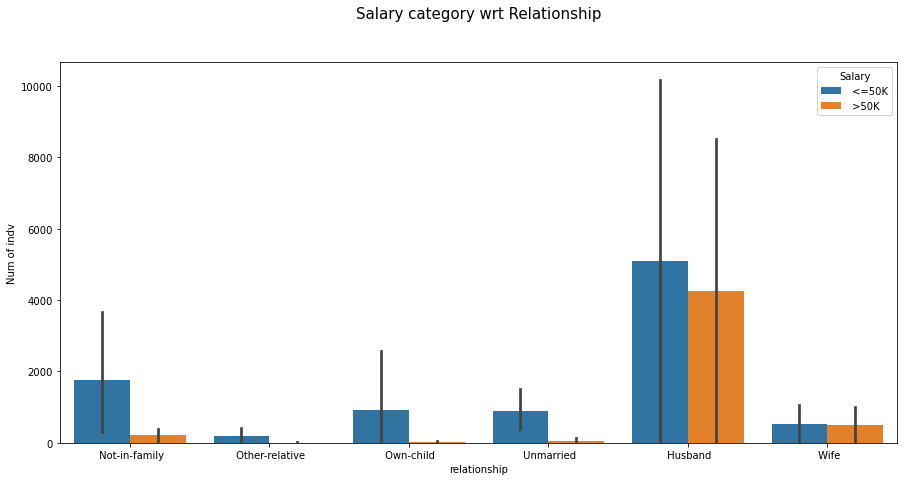

In [26]:
plt.rcParams['figure.figsize']=(15,7)
sns.barplot(x= 'relationship', y='Num of indv', hue='Salary', data=rel_df)
plt.title("Salary category wrt Relationship", y = 1.1, fontsize=15)

By this graph we can futher confirm that indv who are married, who have a husband are higher and are earning <=50k and >50k.

In [27]:
occ_df = df.groupby(['occupation', 'workclass', 'Salary']).size().reset_index().rename(columns={0:'Num of Indv'})
occ_df_sort = occ_df.sort_values('Num of Indv', ascending=False)

In [28]:
occ_df_sort.head()

,occupation,workclass,Salary,Num of Indv
86,Other-service,Private,<=50K,3816
4,Adm-clerical,Private,<=50K,3679
19,Craft-repair,Private,<=50K,3631
125,Sales,Private,<=50K,3348
72,Machine-op-inspct,Private,<=50K,2498


Text(0.5, 1.01, 'Diff occupations with corresponding workclass')

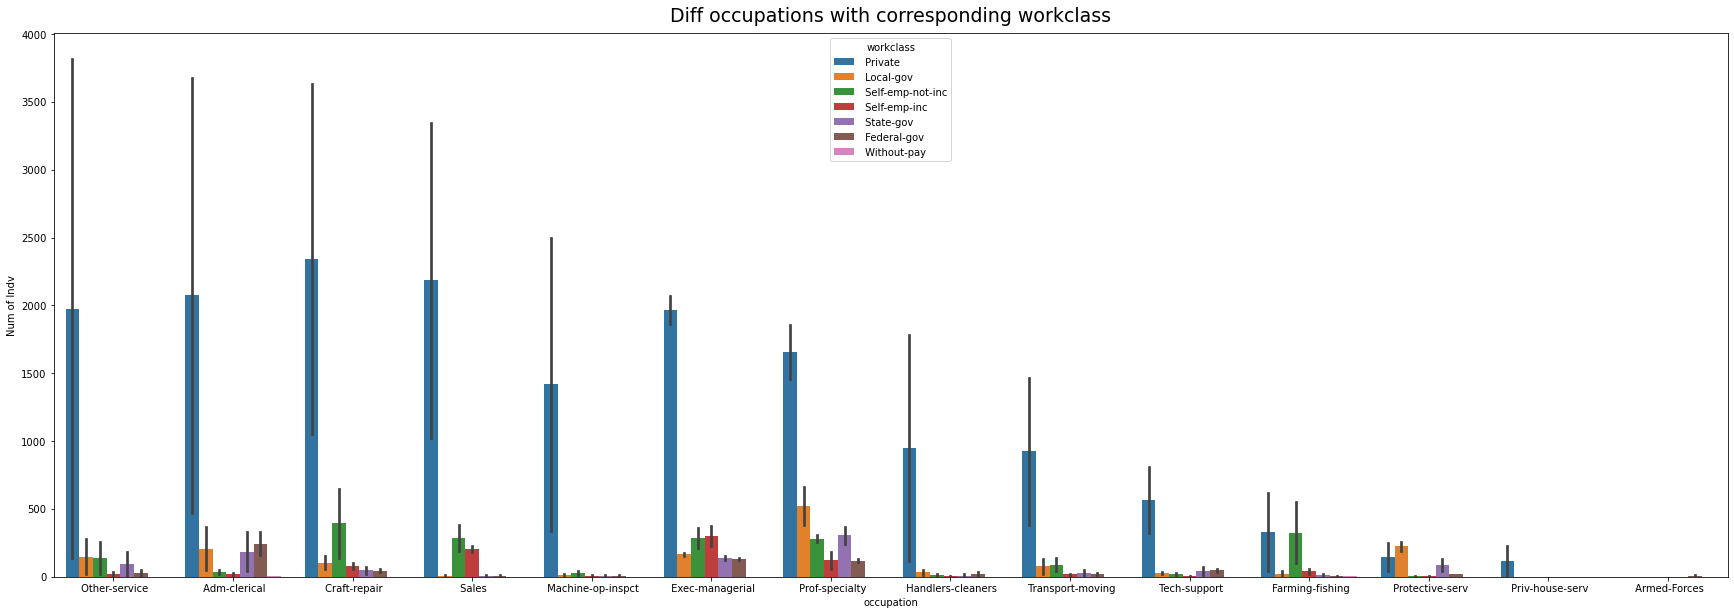

In [29]:
plt.rcParams['figure.figsize']=(30,10)
sns.barplot(x='occupation', y = 'Num of Indv', hue='workclass', data=occ_df_sort)
plt.title("Diff occupations with corresponding workclass", y=1.01, fontsize=19)

# Observation:

Private workclass indvs are highest in all occupations, except Protective-serv.

Highest num of indv are working in Other-service then Adm-clerical, then Craft-repair.

Text(0.5, 1.01, 'Salary categories corresponding to diff occupation')

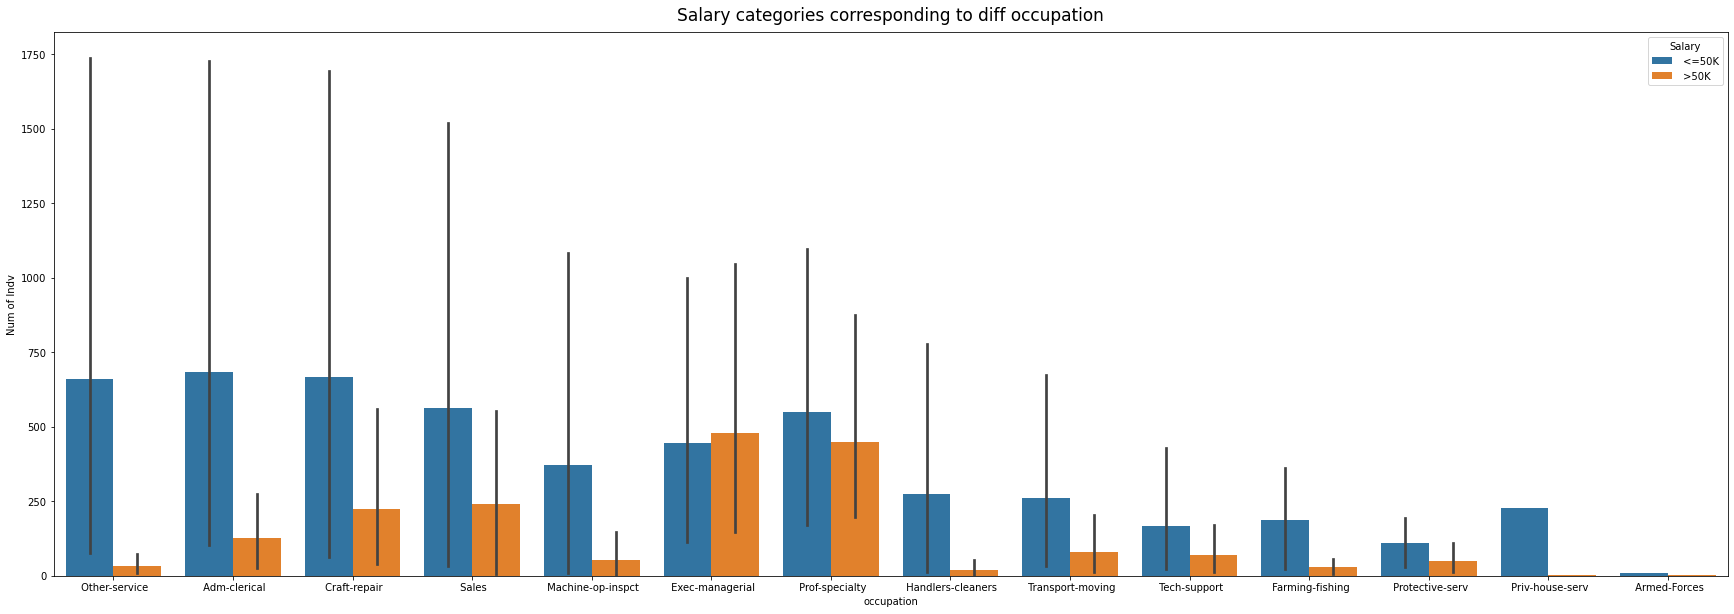

In [30]:
sns.barplot(x='occupation', y='Num of Indv', hue='Salary', data=occ_df_sort)
plt.title("Salary categories corresponding to diff occupation", y=1.01, fontsize=17)

In [31]:
race_df = df.groupby(['Salary', 'race']).size().reset_index().rename(columns={0:'Num of indv'})
race_df_sort = race_df.sort_values('Num of indv', ascending=False)
race_df_sort

,Salary,race,Num of indv
4,<=50K,White,28695
9,>50K,White,10207
2,<=50K,Black,3694
1,<=50K,Asian-Pac-Islander,934
7,>50K,Black,534
0,<=50K,Amer-Indian-Eskimo,382
6,>50K,Asian-Pac-Islander,369
3,<=50K,Other,308
5,>50K,Amer-Indian-Eskimo,53
8,>50K,Other,45


Text(0.5, 1.02, 'Salary dist according to race')

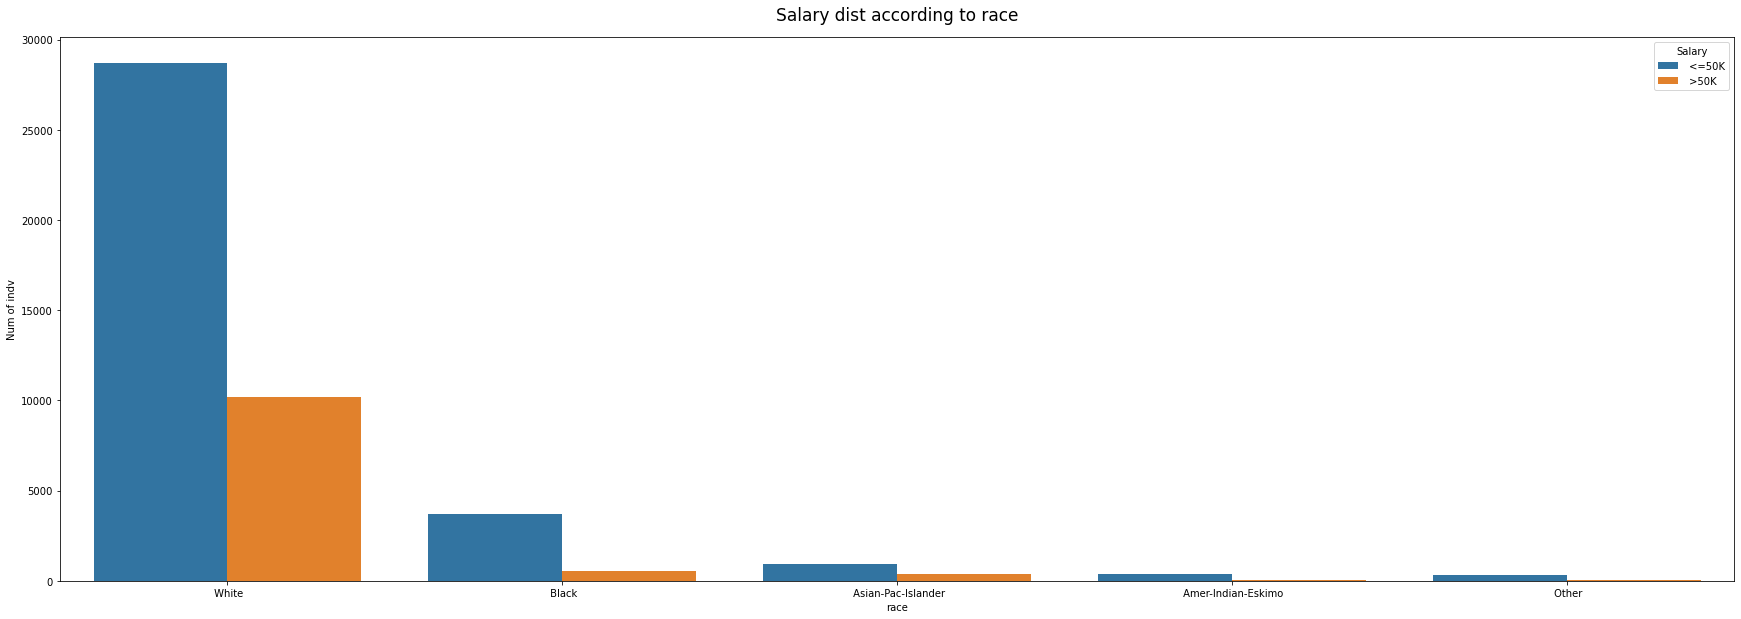

In [32]:
sns.barplot(x = 'race', y='Num of indv', hue='Salary', data=race_df_sort)
plt.title("Salary dist according to race", y=1.02, fontsize=17)

Observation:

It is very evident that indv of race 'white' have the highest in our data and in both salary category <=50k and >50k.

In [33]:
sex_df = df.groupby(['Salary', 'sex']).size().reset_index().rename(columns={0:'Num of indv'})
sex_df_sort = sex_df.sort_values('Num of indv', ascending=False)
sex_df_sort

,Salary,sex,Num of indv
1,<=50K,Male,20988
0,<=50K,Female,13025
3,>50K,Male,9539
2,>50K,Female,1669


Text(0.5, 1.02, 'Salary dist according to sex')

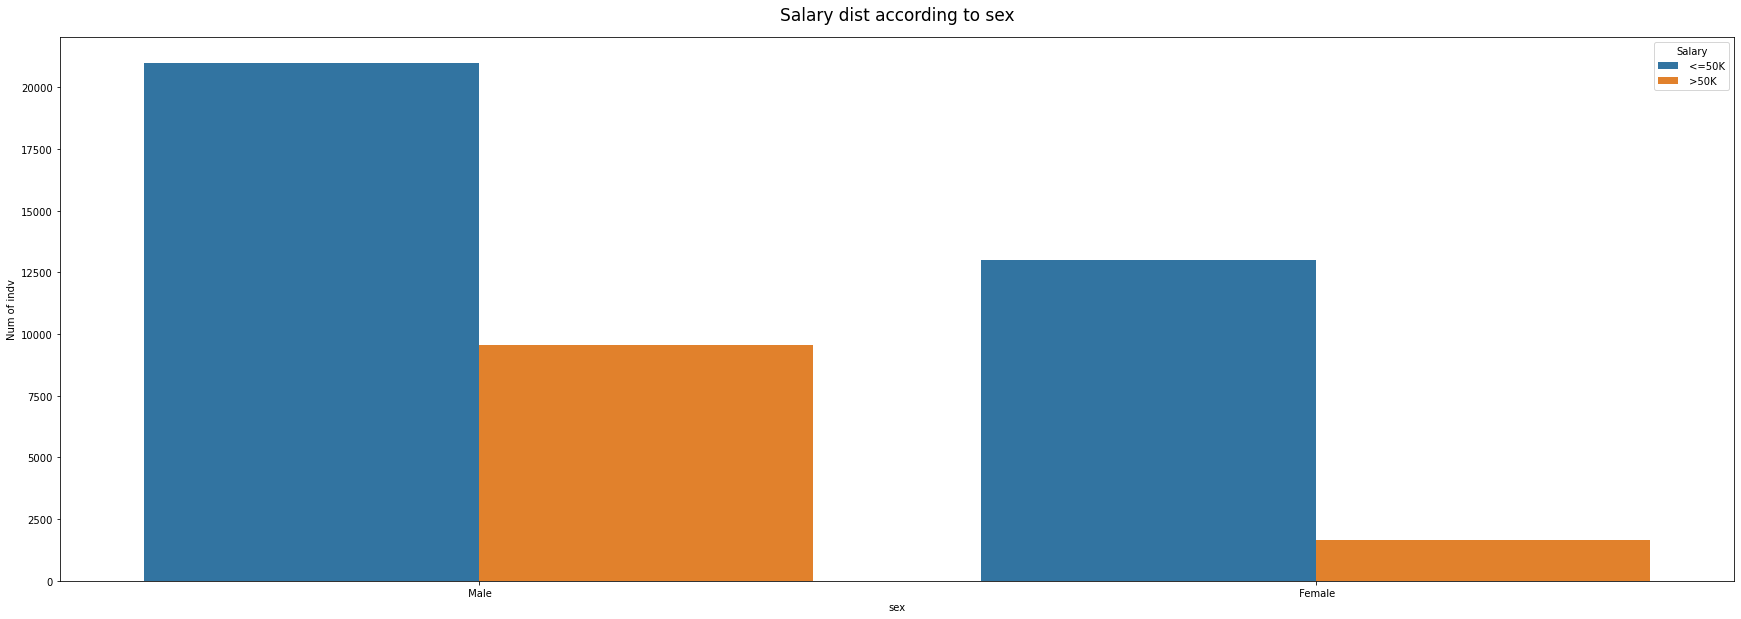

In [34]:
sns.barplot(x = 'sex', y='Num of indv', hue='Salary', data=sex_df_sort)
plt.title("Salary dist according to sex", y=1.02, fontsize=17)

Overall trend is male are doing more jobs than female and have higher ratio in both salary categories.

In [35]:
nat_df = df.groupby(['Salary','native']).size().reset_index().rename(columns={0:'Num of indv'})
nat_df_sort = nat_df.sort_values('Num of indv', ascending=False)
nat_df_sort.head()

,Salary,native,Num of indv
37,<=50K,United-States,30844
77,>50K,United-States,10448
24,<=50K,Mexico,856
28,<=50K,Philippines,199
31,<=50K,Puerto-Rico,155


Text(0.5, 1.01, 'Top 10 native locations corresponding to Salary')

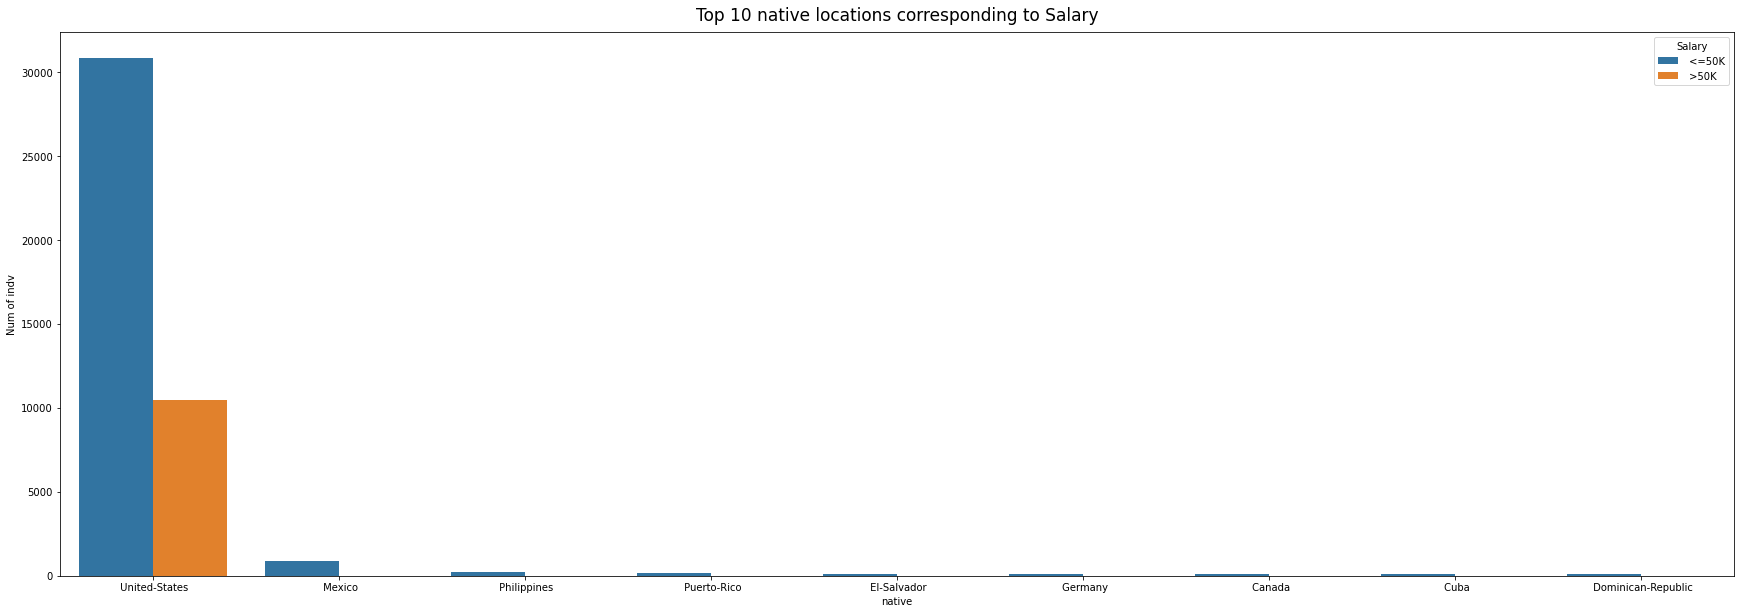

In [36]:
sns.barplot(x='native', y='Num of indv', hue='Salary', data=nat_df_sort.head(10))
plt.title("Top 10 native locations corresponding to Salary", fontsize=17, y=1.01)

Observation

Majority of indv are native to US.

Then next ranks go to Mexico, Philippines and Puerto-Rico

In [37]:
df.columns

Index(['age', 'workclass', 'education', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'native', 'Salary'],
      dtype='object')

# Label Encoding

In [38]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:,-1])

In [39]:
df.head()            #0 - <=50K, 1- >50K

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


Text(0.5, 1.01, 'Age diff for salary category')

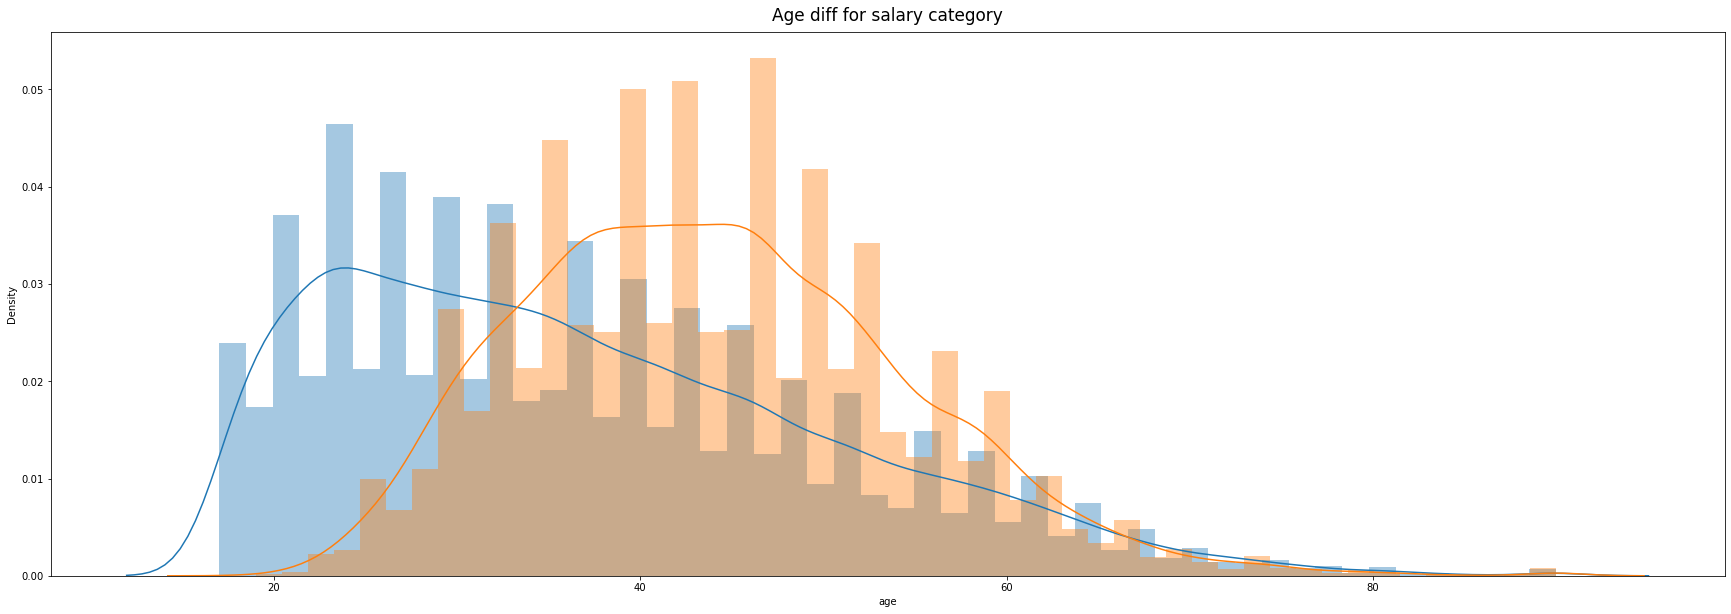

In [40]:
sns.distplot(df[df['Salary']==0]['age'])
sns.distplot(df[df['Salary']==1]['age'])                 #orange for Salary>50K, blue for Salary<=50K
plt.title("Age diff for salary category", y=1.01, fontsize=17)

# Observation:

Indv who have Salary<=50K are relatively younger.

Indv who have Salary>50K are comparitively older.

Text(0.5, 1.01, 'Capital Gain and Loss for salary <=50K')

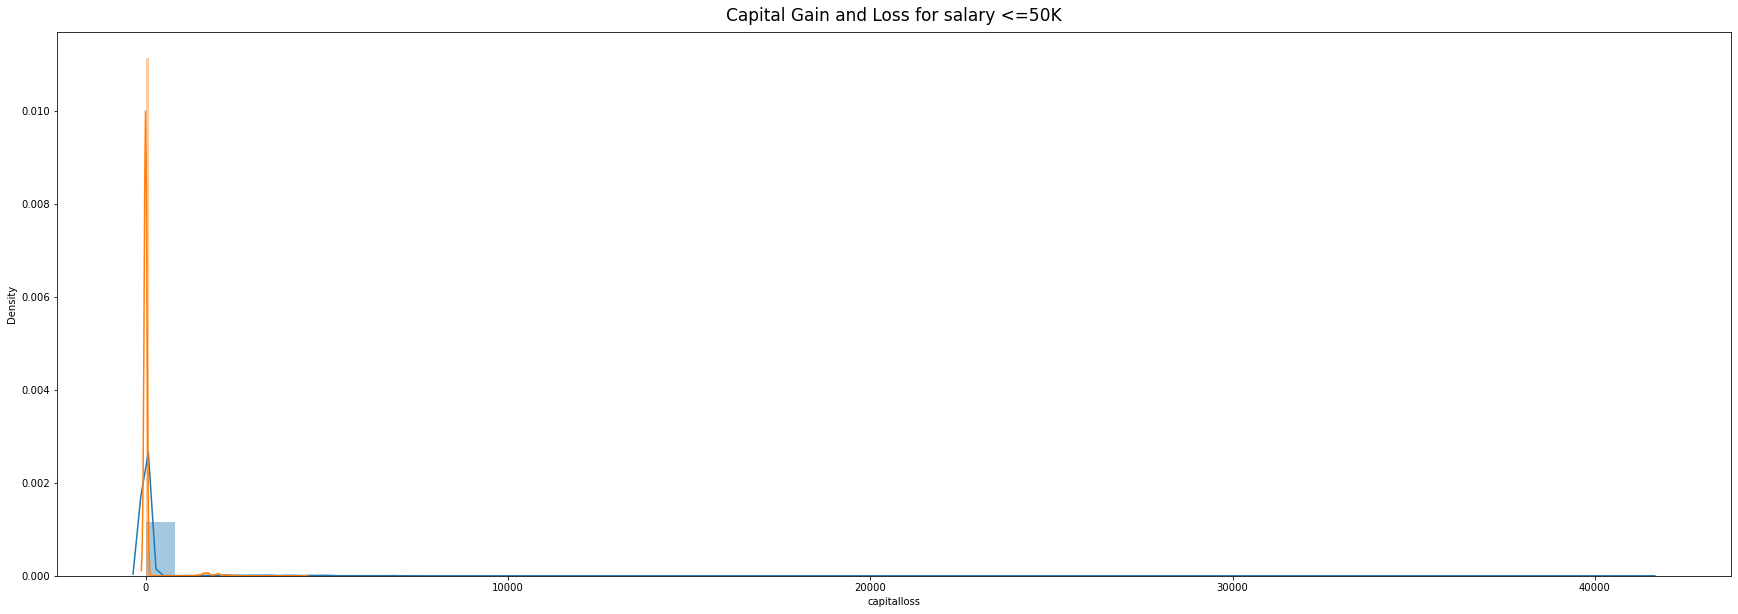

In [41]:
sns.distplot(df[df['Salary']==0]['capitalgain'])
sns.distplot(df[df['Salary']==0]['capitalloss'])    
plt.title("Capital Gain and Loss for salary <=50K", y=1.01, fontsize=17)      #orange for capitalloss, blue for capitalgain

Data is highly skewed.

Capital gain has a very large range from 0-45000, whereas capital loss has lower range from 0-5000.

Capital Loss for salaried indv <=50k are very high than capital gain.

Text(0.5, 1.01, 'Capital Gain and Loss for salary >50K')

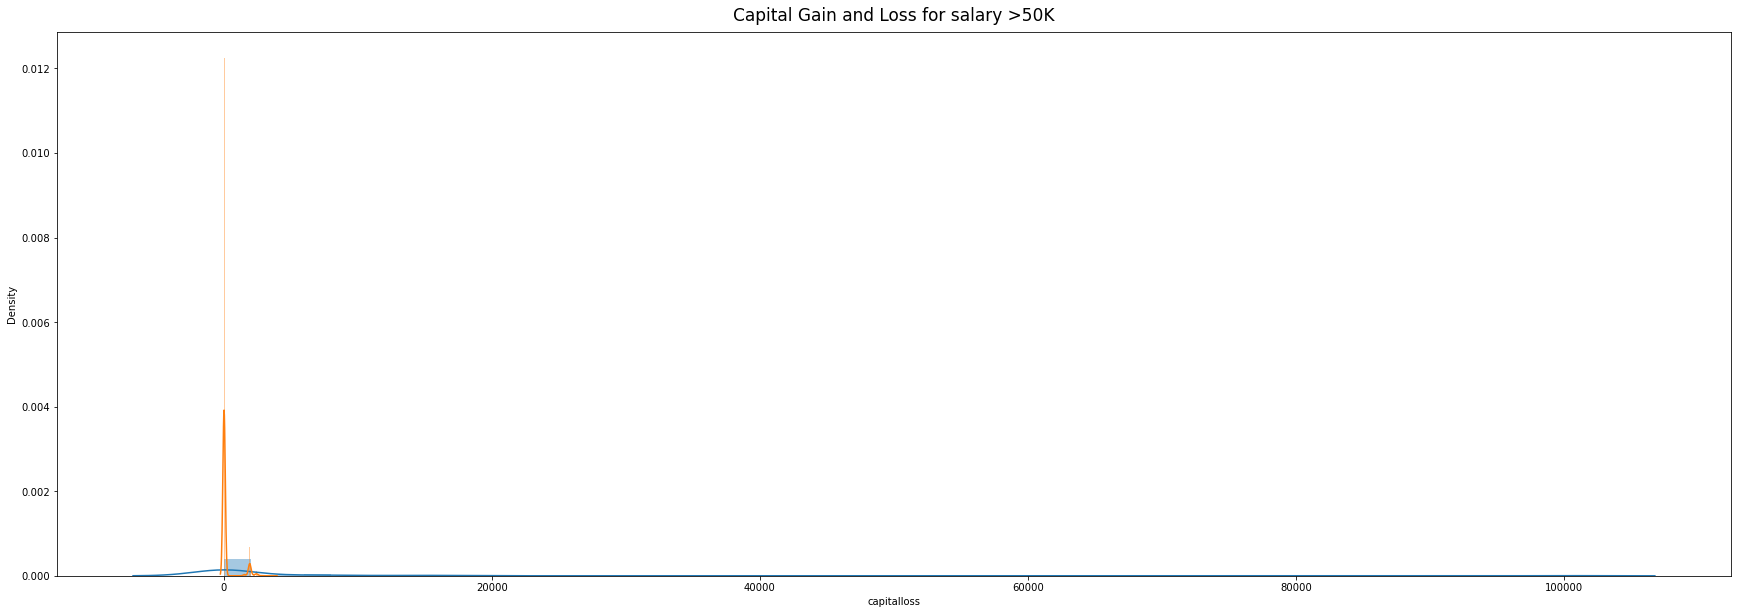

In [42]:
sns.distplot(df[df['Salary']==1]['capitalgain'])
sns.distplot(df[df['Salary']==1]['capitalloss'])     
plt.title("Capital Gain and Loss for salary >50K", y=1.01, fontsize=17)           #

Data is highly skewed.

Capital gain has a very large range from 0-100000, whereas capital loss has lower range from 0-4000.

Capital Loss for salaried indv >50k are very high than capital gain.

Text(0.5, 1.01, 'Hours worked per week for diff salary category')

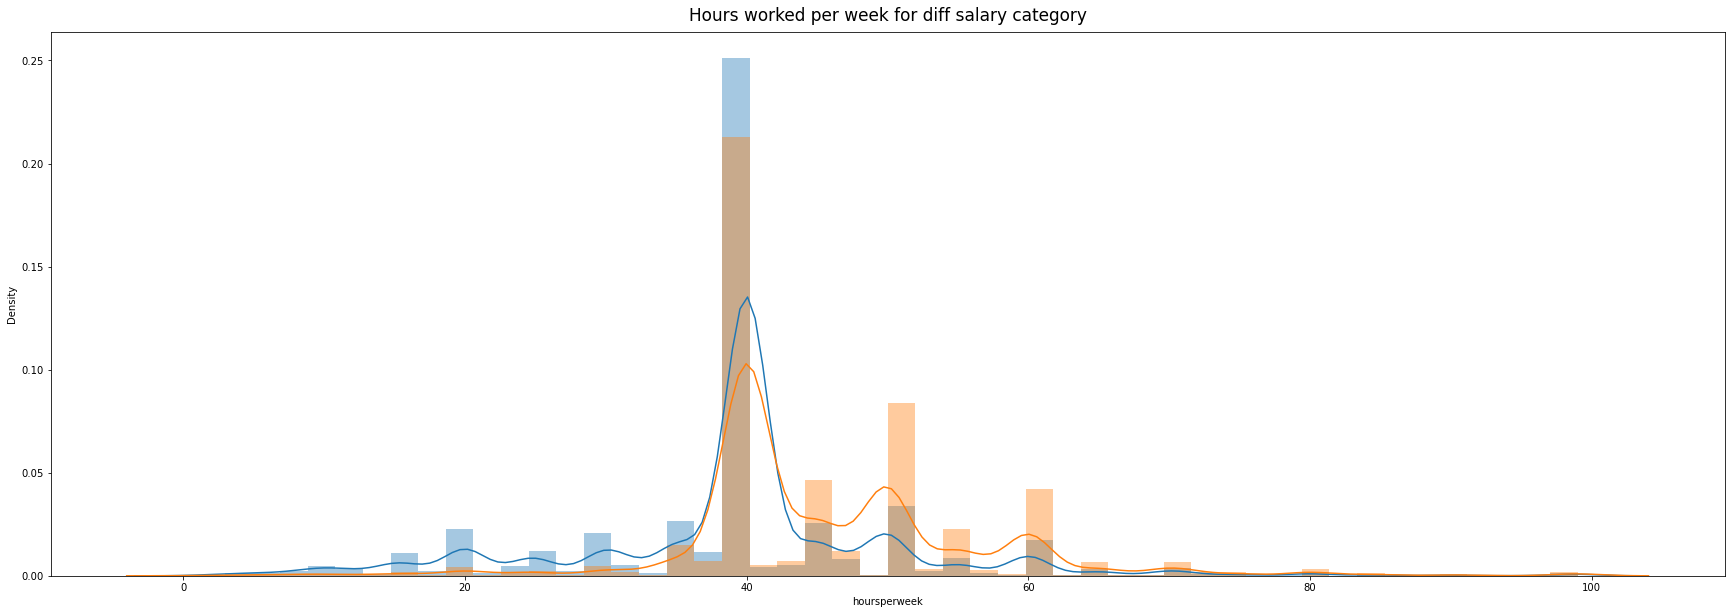

In [43]:
sns.distplot(df[df['Salary']==0]['hoursperweek'])
sns.distplot(df[df['Salary']==1]['hoursperweek'])     
plt.title("Hours worked per week for diff salary category", y=1.01, fontsize=17)           #orange for salary > 50K, blue for salary<=50K

Work hours for max indv are between 37-50 hours.



We can observe work hours are widely distributed for salary category >50K i.e between 35-60 hrs.

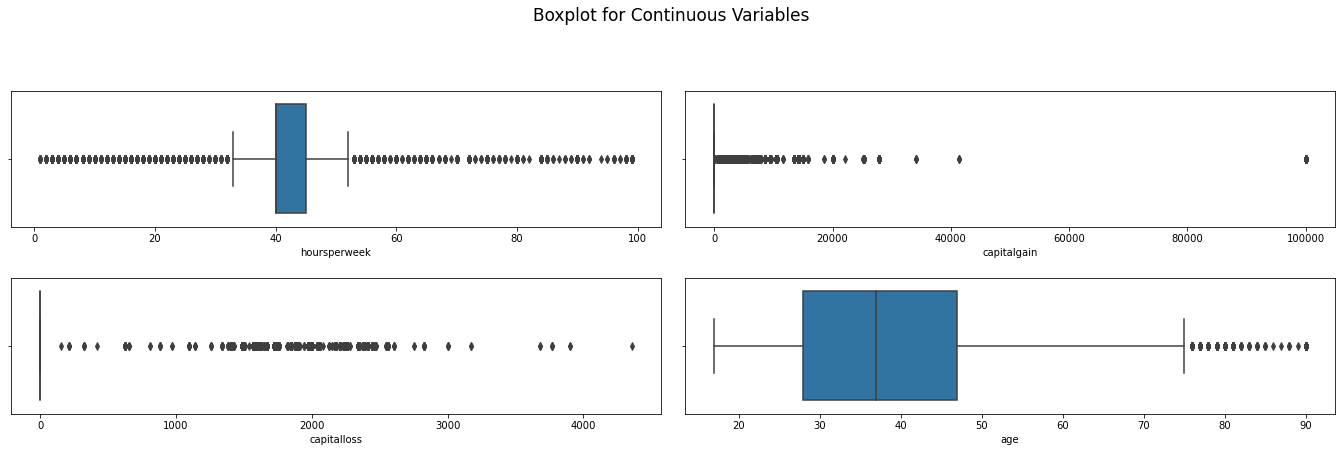

In [44]:
#check for outliers
fig, ax=plt.subplots(2,2, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(df.hoursperweek, ax=ax[0,0])
sns.boxplot(df.capitalgain, ax=ax[0,1])
sns.boxplot(df.capitalloss, ax=ax[1,0])
sns.boxplot(df.age, ax=ax[1,1])
plt.suptitle("Boxplot for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

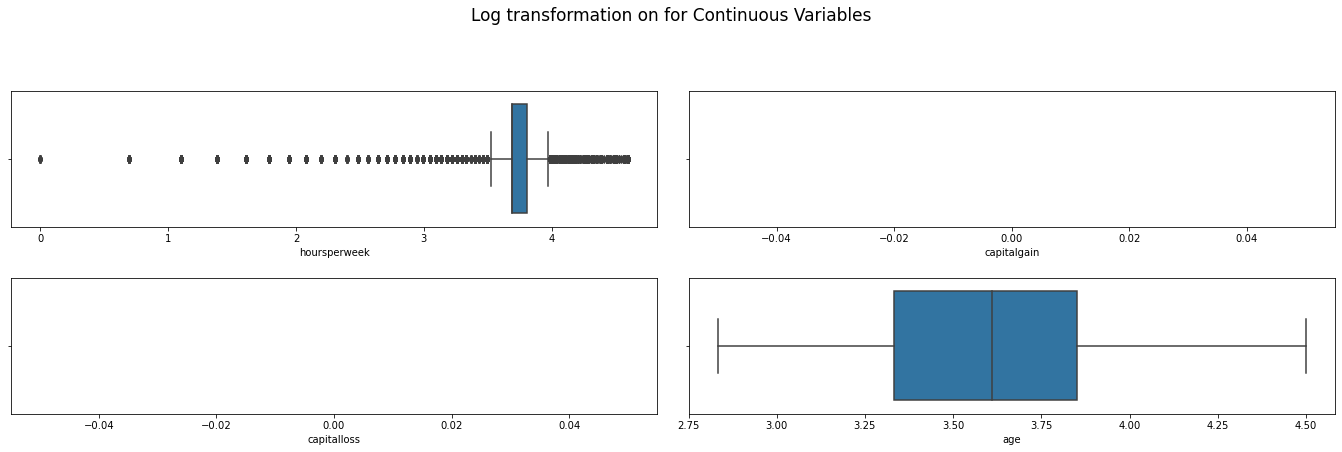

In [45]:
#Lets treat outlier by log transfromation
fig, ax=plt.subplots(2,2, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.log(df.hoursperweek), ax=ax[0,0])
sns.boxplot(np.log(df.capitalgain), ax=ax[0,1])
sns.boxplot(np.log(df.capitalloss), ax=ax[1,0])
sns.boxplot(np.log(df.age), ax=ax[1,1])
plt.suptitle("Log transformation on for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)


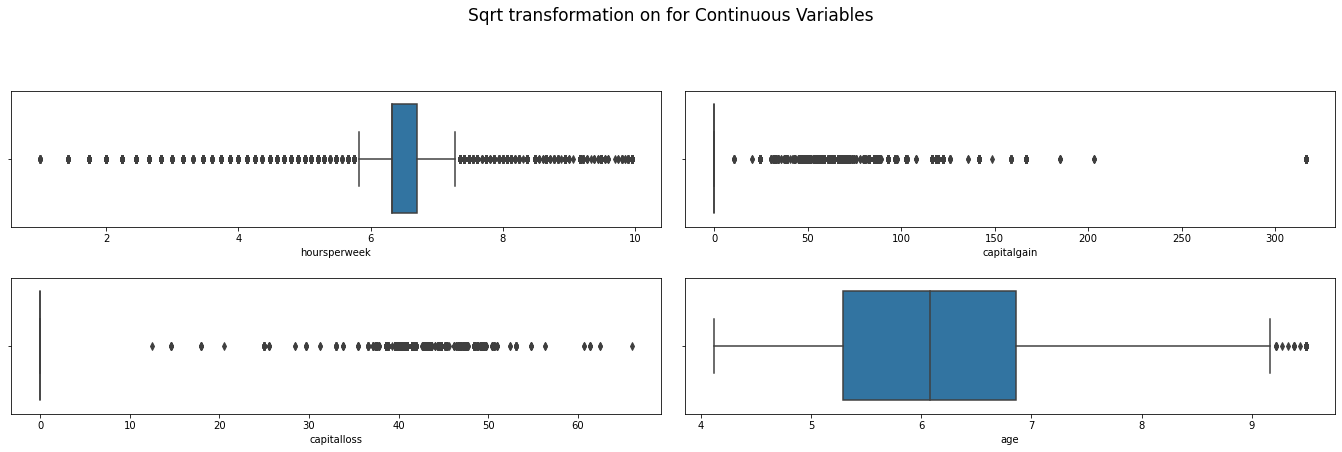

In [46]:
#Lets treat outlier by sqrt transfromation
fig, ax=plt.subplots(2,2, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.sqrt(df.hoursperweek), ax=ax[0,0])
sns.boxplot(np.sqrt(df.capitalgain), ax=ax[0,1])
sns.boxplot(np.sqrt(df.capitalloss), ax=ax[1,0])
sns.boxplot(np.sqrt(df.age), ax=ax[1,1])
plt.suptitle("Sqrt transformation on for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

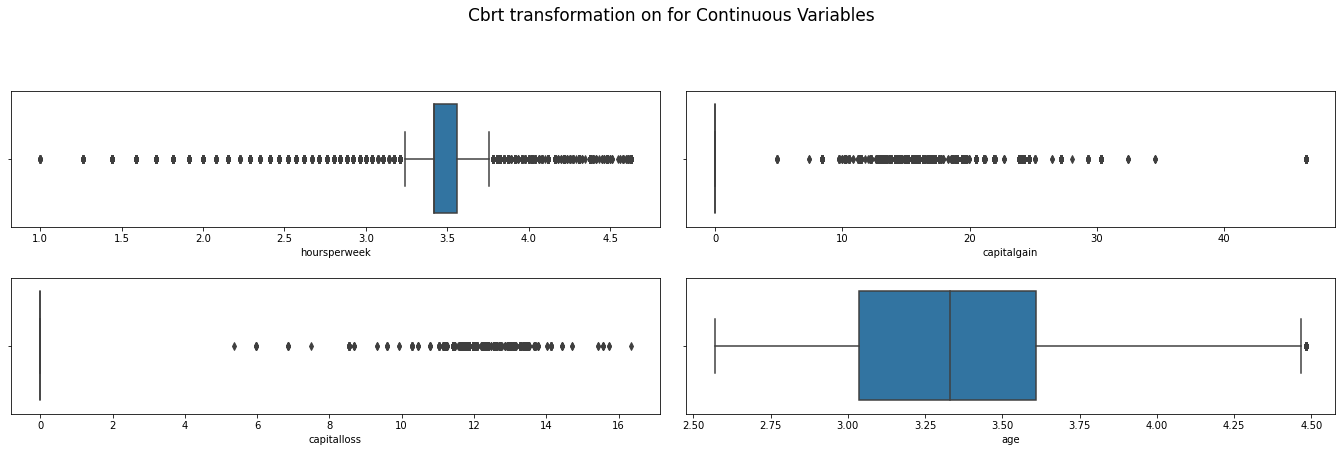

In [47]:
#Lets treat outlier by cbrt transfromation
fig, ax=plt.subplots(2,2, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.cbrt(df.hoursperweek), ax=ax[0,0])
sns.boxplot(np.cbrt(df.capitalgain), ax=ax[0,1])
sns.boxplot(np.cbrt(df.capitalloss), ax=ax[1,0])
sns.boxplot(np.cbrt(df.age), ax=ax[1,1])
plt.suptitle("Cbrt transformation on for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

Only log trnasformation was helpful to treat outliers in age column.

All the rest columns did not perform well with transformation.

# Relation of "Target variable" with other features.

In [48]:
#Correlation of continuous variable with target variable
corr_s = df.corr().iloc[:,-1].reset_index().rename(columns={'index':'feature', 'Salary':'corr'}) 
corr_s

,feature,corr
0,age,0.237035
1,capitalgain,0.221033
2,capitalloss,0.148799
3,hoursperweek,0.227199
4,Salary,1.000000


Text(0.5, 1.01, 'Corr of continuous features with Target variable')

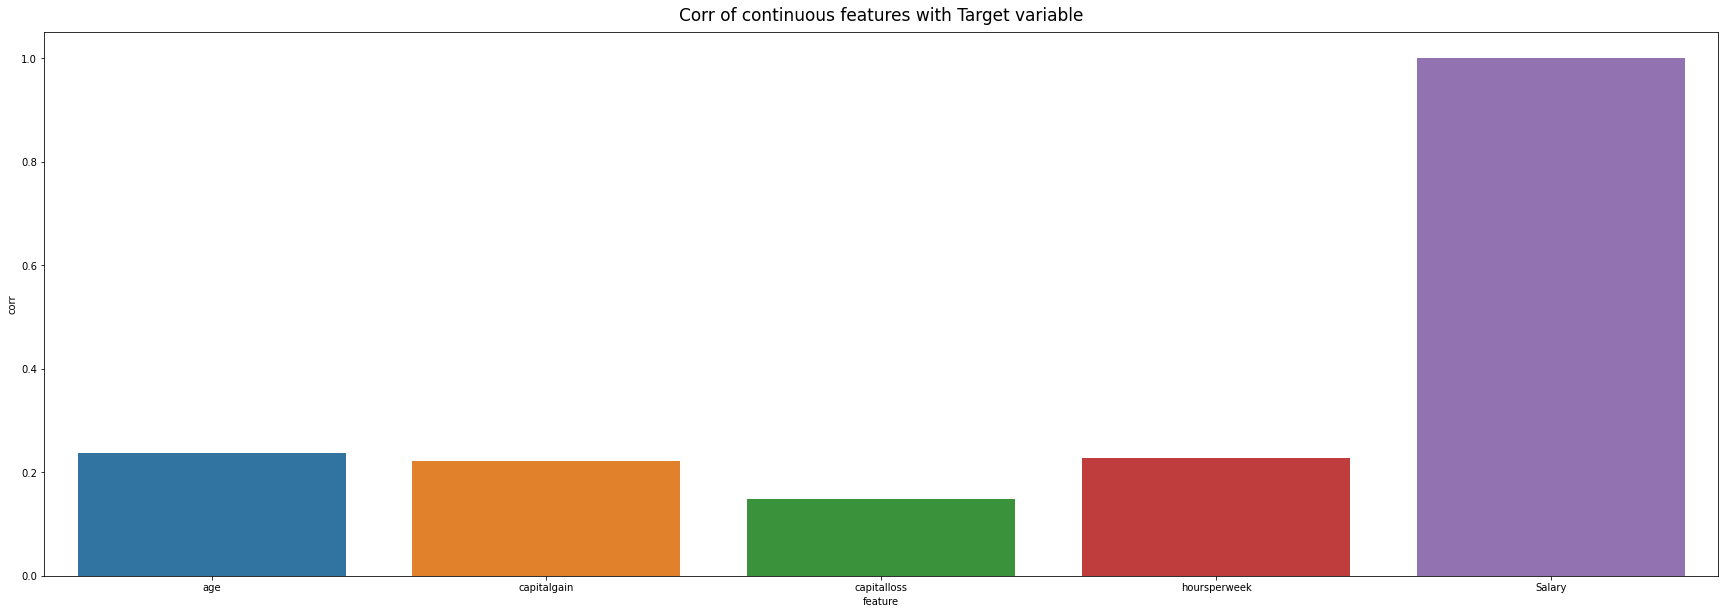

In [49]:
sns.barplot(x='feature', y='corr', data=corr_s)
plt.title("Corr of continuous features with Target variable", fontsize=17, y=1.01)

All countinuous variables have positive correlation with Target variable - Salary.

Text(0.5, 1.01, 'Correlation Map of Countinuous variables with Target variable')

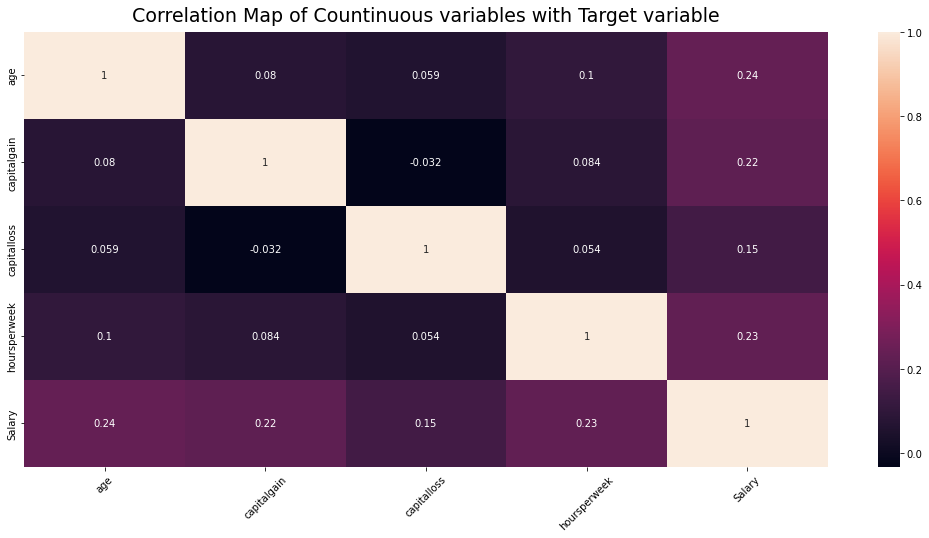

In [50]:
fig= plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True);
plt.xticks(rotation=45)
plt.title("Correlation Map of Countinuous variables with Target variable", fontsize=19, y = 1.01)

In [51]:
!pip install ppscore

In [54]:
import ppscore as PPS
score = PPS.matrix(df)
score_s = score[score['x']=='Salary']
score_s

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
156,Salary,age,4.018066e-02,regression,True,mean absolute error,10.770200,10.337446,DecisionTreeRegressor()
157,Salary,workclass,1.647983e-07,classification,True,weighted F1,0.633179,0.633179,DecisionTreeClassifier()
158,Salary,education,1.021341e-02,classification,True,weighted F1,0.205200,0.213318,DecisionTreeClassifier()
159,Salary,maritalstatus,1.805044e-01,classification,True,weighted F1,0.335200,0.455199,DecisionTreeClassifier()
160,Salary,occupation,0.000000e+00,classification,True,weighted F1,0.110800,0.080664,DecisionTreeClassifier()
161,Salary,relationship,1.032196e-01,classification,True,weighted F1,0.278000,0.352525,DecisionTreeClassifier()
162,Salary,race,0.000000e+00,classification,True,weighted F1,0.808948,0.808948,DecisionTreeClassifier()
163,Salary,sex,0.000000e+00,classification,True,weighted F1,0.565600,0.549702,DecisionTreeClassifier()
164,Salary,capitalgain,0.000000e+00,regression,True,mean absolute error,965.027600,1594.005498,DecisionTreeRegressor()
165,Salary,capitalloss,0.000000e+00,regression,True,mean absolute error,84.345000,159.137605,DecisionTreeRegressor()


Text(0.5, 1.01, 'PPScore of each feature with Target variable')

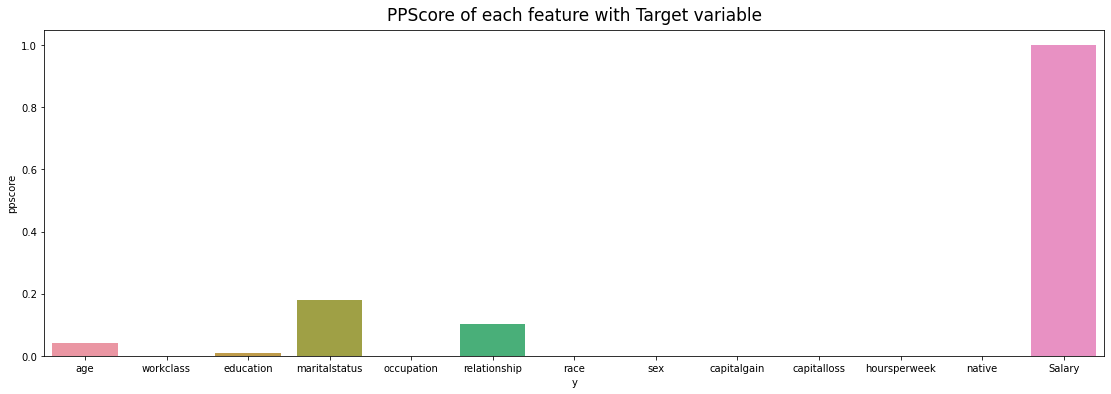

In [55]:
plt.rcParams['figure.figsize']=(19,6)
sns.barplot(x='y', y='ppscore', data=score_s)
plt.title("PPScore of each feature with Target variable", fontsize=17, y=1.01)

Marital status, relationship, age have ppscore among all the fetures.
Data Preprocessing

In [56]:
df1=df.reset_index()
df = df1.drop('index', axis=1)
df

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
45217,39,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
45218,38,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
45219,44,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


# Handle categorical features

In [57]:
df['workclass'] = df['workclass'].map({' State-gov':1, ' Self-emp-not-inc':2, ' Private' :3, ' Federal-gov':4, ' Local-gov':5,
                                       ' Self-emp-inc':6,' Without-pay' : 7})

In [58]:
df['maritalstatus'] = df['maritalstatus'].map({' Never-married':1, ' Married-civ-spouse':2, ' Divorced':3,
       ' Married-spouse-absent':4, ' Separated':5, ' Married-AF-spouse':6,
       ' Widowed':7})

In [59]:
df['occupation'] = df['occupation'].map({' Adm-clerical':1, ' Exec-managerial':2, ' Handlers-cleaners':3,
       ' Prof-specialty':4, ' Other-service':5, ' Sales':5, ' Transport-moving':6,
       ' Farming-fishing':7, ' Machine-op-inspct':8, ' Tech-support':9,
       ' Craft-repair':10, ' Protective-serv':11, ' Armed-Forces':12,
       ' Priv-house-serv':12})

In [60]:
df['relationship'] = df['relationship'].map({' Not-in-family':1, ' Husband':2, ' Wife':3, ' Own-child':4, ' Unmarried':5,
       ' Other-relative':6})

In [61]:
df['race'] = df['race'].map({' White':1, ' Black':2, ' Asian-Pac-Islander':3, ' Amer-Indian-Eskimo':4,
       ' Other':5})

In [62]:
df['sex'] = df['sex'].map({' Male':1, ' Female':2})

In [63]:
df['native'] = df['native'].map({' United-States':1, ' Cuba':2, ' Jamaica':3, ' India':4, ' Mexico':5,
       ' Puerto-Rico':6, ' Honduras':7, ' England':8, ' Canada':9, ' Germany':10,
       ' Iran':11, ' Philippines':12, ' Poland':13, ' Columbia':14, ' Cambodia':15,
       ' Thailand':16, ' Ecuador':17, ' Laos':18, ' Taiwan':19, ' Haiti':20, ' Portugal':21,
       ' Dominican-Republic':22, ' El-Salvador':23, ' France':24, ' Guatemala':25,
       ' Italy':26, ' China':27, ' South':28, ' Japan':29, ' Yugoslavia':30, ' Peru':31,
       ' Outlying-US(Guam-USVI-etc)':32, ' Scotland':33, ' Trinadad&Tobago':34,
       ' Greece':35, ' Nicaragua':36, ' Vietnam':37, ' Hong':38, ' Ireland':39,
       ' Hungary':40})

In [64]:
df['education'] = df['education'].map({' Bachelors':1, ' HS-grad':2, ' 11th' :3,  ' Masters':4, ' 9th':5,
                                       ' Some-college':6,' Assoc-acdm' : 7, ' 7th-8th':8, ' Doctorate':9,
       ' Assoc-voc':10, ' Prof-school':11, ' 5th-6th':12, ' 10th':13, ' Preschool':14,
       ' 12th':15, ' 1st-4th':16})

In [65]:
df.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,1,1,1,1,1,1,1,2174,0,40,1,0
1,50,2,1,2,2,2,1,1,0,0,13,1,0
2,38,3,2,3,3,1,1,1,0,0,40,1,0
3,53,3,3,2,3,2,2,1,0,0,40,1,0
4,28,3,1,2,4,3,2,2,0,0,40,2,0


In [66]:
df.shape

(45221, 13)

In [67]:
#check for outliers
from sklearn.ensemble import IsolationForest
data1=df.copy()

#training the model
clf = IsolationForest(random_state=10, contamination=.001)
clf.fit(data1)
data1['anamoly'] = clf.predict(data1.iloc[:,0:17])
outliers = data1[data1['anamoly']==-1]

In [68]:
outliers.index

Int64Index([ 1678,  2231,  2648,  2669,  3068,  6497,  8044,  8995, 11654,
            12895, 15999, 16249, 16318, 19371, 19396, 19503, 19896, 20812,
            21732, 22529, 22695, 25159, 25186, 25578, 25862, 26195, 26701,
            27565, 29957, 33180, 33871, 34583, 35491, 35987, 36220, 37764,
            37904, 39278, 39434, 39819, 40420, 42336, 42563, 43486, 44505,
            44590],
           dtype='int64')

In [69]:
df.drop([1678,  2231,  2648,  2669,  3068,  6497,  8044,  8995, 11654,
            12895, 15999, 16249, 16318, 19371, 19396, 19503, 19896, 20812,
            21732, 22529, 22695, 25159, 25186, 25578, 25862, 26195, 26701,
            27565, 29957, 33180, 33871, 34583, 35491, 35987, 36220, 37764,
            37904, 39278, 39434, 39819, 40420, 42336, 42563, 43486, 44505,
            44590],axis=0, inplace=True)

In [70]:
df.shape

(45175, 13)

# Splitting data into target variable and independent variables

In [71]:
data=df.copy()

In [72]:
x=data.drop('Salary', axis=1)
y = data['Salary']

In [73]:
#Standardize?Normalize the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
std = StandardScaler()

x_norm = pd.DataFrame(norm.fit_transform(x), columns=x.columns)            #data between -3 to +3
x_std = pd.DataFrame(std.fit_transform(x), columns=x.columns)            #data between -1 to +1

In [74]:
x_std.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.035720,-2.245242,-0.980950,-0.881261,-1.380788,-1.059232,-0.344033,-0.693438,0.147698,-0.218045,-0.078353,-0.236991
1,0.869183,-1.180328,-0.980950,-0.062088,-1.048995,-0.360864,-0.344033,-0.693438,-0.146441,-0.218045,-2.330805,-0.236991
2,-0.040049,-0.115414,-0.693258,0.757084,-0.717202,-1.059232,-0.344033,-0.693438,-0.146441,-0.218045,-0.078353,-0.236991
3,1.096491,-0.115414,-0.405565,-0.062088,-0.717202,-0.360864,1.292796,-0.693438,-0.146441,-0.218045,-0.078353,-0.236991
4,-0.797742,-0.115414,-0.980950,-0.062088,-0.385409,0.337505,1.292796,1.442090,-0.146441,-0.218045,-0.078353,-0.031744


In [77]:
 x_norm.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.301370,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.02174,0.0,0.397959,0.000000
1,0.452055,0.166667,0.000000,0.166667,0.090909,0.2,0.00,0.0,0.00000,0.0,0.122449,0.000000
2,0.287671,0.333333,0.066667,0.333333,0.181818,0.0,0.00,0.0,0.00000,0.0,0.397959,0.000000
3,0.493151,0.333333,0.133333,0.166667,0.181818,0.2,0.25,0.0,0.00000,0.0,0.397959,0.000000
4,0.150685,0.333333,0.000000,0.166667,0.272727,0.4,0.25,1.0,0.00000,0.0,0.397959,0.025641


In [76]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.33)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((30267, 12), (14908, 12), (30267,), (14908,))

# Buid a Model

# Grid Search CV

# Kernel - RBF

In [78]:
#As my system infrastructure is not so good so I am selecting only 10% rows to build model, with 30k rows it is taking lot of time to execute.
x_trn = x_train.iloc[0:3000,:]
y_trn = y_train[0:3000]
x_tst = x_test.iloc[0:1500,:]
y_tst = y_test.iloc[0:1500]

In [79]:
clf = SVC()
param_grids = [{'kernel':['rbf'], 'C': [15,14,13,12,11,10,1,0.1,0.001]}]
grid = GridSearchCV(clf, param_grids, cv=20)
grid.fit(x_train.iloc[0:3000,:],y_train.iloc[0:3000])

GridSearchCV(cv=20, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 1, 0.1, 0.001],
                          'kernel': ['rbf']}])

In [80]:
grid.best_score_, grid.best_params_

(0.8223333333333332, {'C': 10, 'kernel': 'rbf'})

In [81]:
#rbf kernel with gamma as scale
clf=SVC(kernel='rbf', C=12, gamma = 'scale')
clf.fit(x_train.iloc[0:3000,:], y_train.iloc[0:3000])
y_pred = clf.predict(x_test.iloc[0:1500,:])
y_pred1 = clf.predict(x_train.iloc[0:3000,:])
acc = accuracy_score(y_pred, y_test.iloc[0:1500])*100
print("Test Accuracy=" , acc)
acc1 = accuracy_score(y_pred1, y_train.iloc[0:3000])*100
print("Train Accuracy=" , acc1)
confusion_matrix(y_test.iloc[0:1500], y_pred)

Test Accuracy= 82.53333333333333
Train Accuracy= 87.93333333333334


array([[1079,   69],
       [ 193,  159]], dtype=int64)

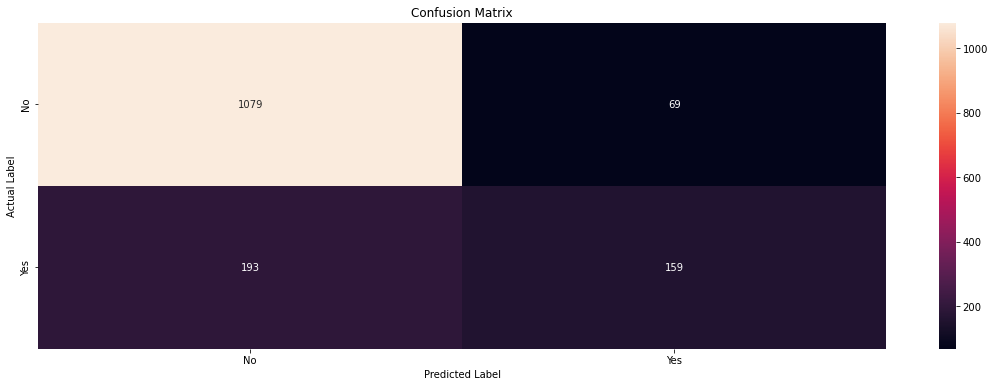

In [82]:
# plot confusion matrix to describe the performance of classifier.

cm_df=confusion_matrix(y_test.iloc[0:1500], y_pred)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [83]:
#rbf kernel with gamma as auto
clf=SVC(kernel='rbf', C=12, gamma = 'auto')
clf.fit(x_train.iloc[0:3000,:], y_train.iloc[0:3000])
y_pred = clf.predict(x_test.iloc[0:1500,:])
y_pred1 = clf.predict(x_train.iloc[0:3000,:])
acc = accuracy_score(y_pred, y_test.iloc[0:1500])*100
print("Test Accuracy=" , acc)
acc1 = accuracy_score(y_pred1, y_train.iloc[0:3000])*100
print("Train Accuracy=" , acc1)
confusion_matrix(y_test.iloc[0:1500], y_pred)

Test Accuracy= 82.46666666666667
Train Accuracy= 87.93333333333334


array([[1079,   69],
       [ 194,  158]], dtype=int64)

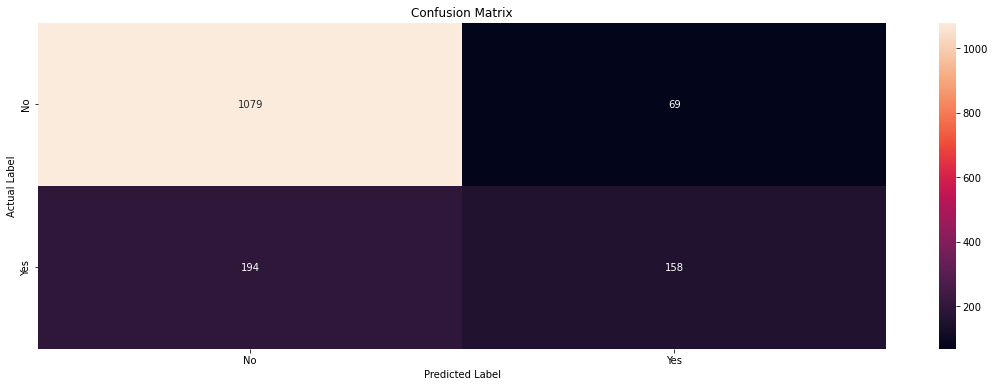

In [84]:
# plot confusion matrix to describe the performance of classifier.

cm_df=confusion_matrix(y_test.iloc[0:1500], y_pred)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# Kernel - Polynomial

In [86]:
clf = SVC()
param_grids = [{'kernel':['poly'], 'degree':[0,1,2,3,4,5,6], 'C': [15,14,13,12,11,10,1,0.1,0.001]}]
grid = GridSearchCV(clf, param_grids, cv=20)
grid.fit(x_trn,y_trn)

GridSearchCV(cv=20, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 1, 0.1, 0.001],
                          'degree': [0, 1, 2, 3, 4, 5, 6],
                          'kernel': ['poly']}])

In [87]:
grid.best_score_, grid.best_params_

(0.8126666666666665, {'C': 14, 'degree': 2, 'kernel': 'poly'})

In [88]:
clf_p=SVC(kernel='poly', C=10, degree =2 )
clf_p.fit(x_trn, y_trn)
y_pred_p = clf_p.predict(x_tst)
y_pred1 = clf_p.predict(x_trn)
acc = accuracy_score(y_pred, y_tst)*100
print("Test Accuracy=" , acc)
acc1 = accuracy_score(y_pred1, y_trn)*100
print("Train Accuracy=" , acc1)
confusion_matrix(y_tst, y_pred_p)

Test Accuracy= 82.46666666666667
Train Accuracy= 82.1


array([[1132,   16],
       [ 262,   90]], dtype=int64)

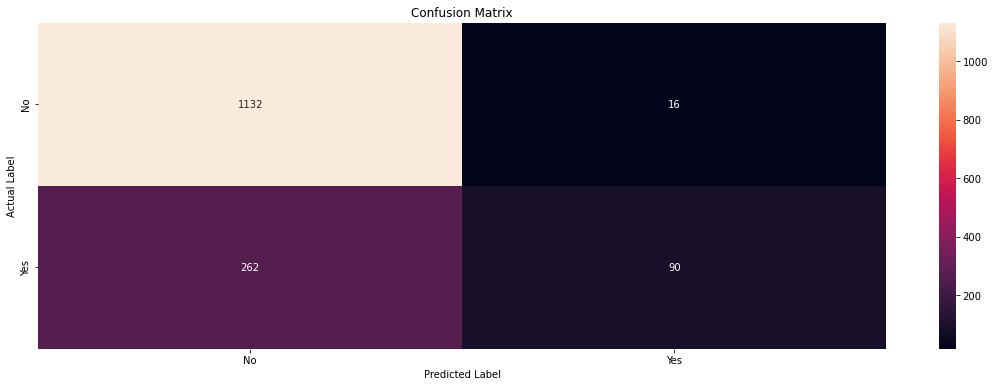

In [89]:
# plot confusion matrix to describe the performance of classifier.

cm_df=confusion_matrix(y_tst, y_pred_p)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# Kernel - Sigmoid

In [90]:
clf = SVC()
param_grids = [{'kernel':['sigmoid'], 'C': [15,14,13,12,11,10,1,0.1,0.001]}]
grid = GridSearchCV(clf, param_grids, cv=20)
grid.fit(x_trn,y_trn)

GridSearchCV(cv=20, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 1, 0.1, 0.001],
                          'kernel': ['sigmoid']}])

In [91]:
grid.best_score_, grid.best_params_

(0.7676666666666667, {'C': 0.1, 'kernel': 'sigmoid'})

In [92]:
clf_s=SVC(kernel='sigmoid', C=0.1, gamma='scale')
clf_s.fit(x_trn, y_trn)
y_pred_s = clf_s.predict(x_tst)
acc = accuracy_score(y_pred_s, y_tst)*100
y_pred1 = clf_s.predict(x_trn)
acc1= accuracy_score(y_pred1, y_trn)*100
print("Test Accuracy=" , acc)
print("Train Accuracy=", acc1)
confusion_matrix(y_tst, y_pred_s)

Test Accuracy= 77.66666666666666
Train Accuracy= 76.6


array([[1113,   35],
       [ 300,   52]], dtype=int64)

In [93]:
clf_s=SVC(kernel='sigmoid', C=0.01, gamma='auto')
clf_s.fit(x_trn, y_trn)
y_pred_s = clf_s.predict(x_tst)
acc = accuracy_score(y_pred_s, y_tst)*100
y_pred1 = clf_s.predict(x_trn)
acc1= accuracy_score(y_pred1, y_trn)*100
print("Test Accuracy=" , acc)
print("Train Accuracy=", acc1)
confusion_matrix(y_tst, y_pred_s)

Test Accuracy= 77.2
Train Accuracy= 76.2


array([[1148,    0],
       [ 342,   10]], dtype=int64)

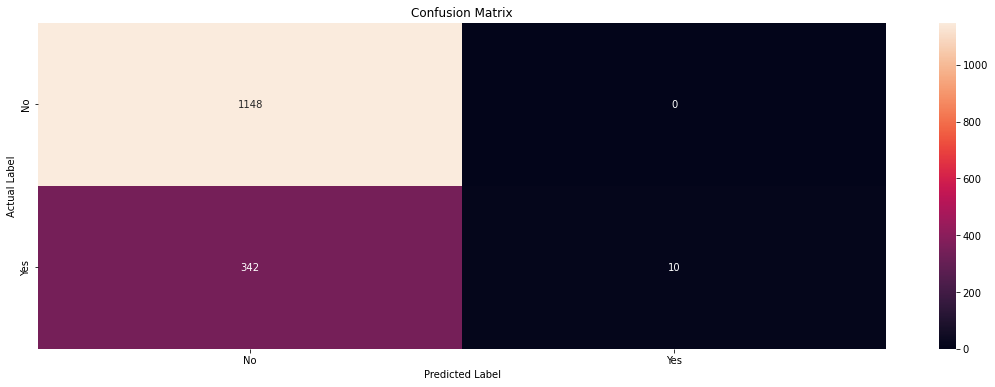

In [94]:
# plot confusion matrix to describe the performance of classifier.

cm_df=confusion_matrix(y_tst, y_pred_s)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# Kernel- Linear

In [95]:
clf = SVC()
param_grids = [{'kernel':['linear'], 'C': [15,14,13,12,11,10,1,0.1,0.001]}]
grid = GridSearchCV(clf, param_grids, cv=10)
grid.fit(x_trn,y_trn)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 1, 0.1, 0.001],
                          'kernel': ['linear']}])

In [96]:
grid.best_score_, grid.best_params_

(0.7903333333333333, {'C': 0.1, 'kernel': 'linear'})

In [97]:
clf_l=SVC(kernel='linear', C=0.1)
clf_l.fit(x_trn, y_trn)
y_pred_l = clf_l.predict(x_tst)
acc = accuracy_score(y_pred_l, y_tst)*100
y_pred1 = clf_l.predict(x_trn)
acc1= accuracy_score(y_pred1, y_trn)*100
print("Test Accuracy=" , acc)
print("Train Accuracy=", acc1)
confusion_matrix(y_tst, y_pred_l)

Test Accuracy= 79.60000000000001
Train Accuracy= 79.66666666666666


array([[1096,   52],
       [ 254,   98]], dtype=int64)

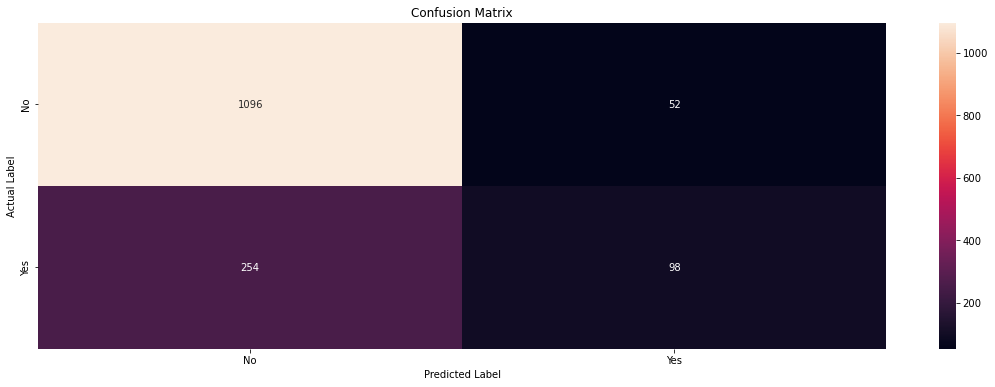

In [98]:
# plot confusion matrix to describe the performance of classifier.

cm_df=confusion_matrix(y_tst, y_pred_l)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

We get the highest accuracy of the model in rbf kernel with C = 15 , gamma = auto.

We will be using this model to predict our test data.